In [32]:
#import matplotlib.pyplot as plt 
import cv2
#from pylab import rcParams
from IPython.display import Image
import numpy as np
import mediapipe as mp
import argparse
import imutils
import math
from PIL import Image
import easyocr

In [33]:
reader=easyocr.Reader(['en'])

CUDA not available - defaulting to CPU. Note: This module is much faster with a GPU.


In [34]:
img1 = cv2.imread('ID.jpg')
rcParams['figure.figsize']=8,16
mp_face_detection = mp.solutions.face_detection
face_detection = mp_face_detection.FaceDetection(model_selection=1, min_detection_confidence=0.5)
mp_drawing = mp.solutions.drawing_utils 

In [35]:
def image_rotate(img):

  # Face Analisys

  face_detection_results = face_detection.process(img[:,:,::-1])
  if face_detection_results.detections:
    for face_no, face in enumerate(face_detection_results.detections):
      face_data = face.location_data
  img_height = img.shape[0]
  img_width = img.shape[1]
  rxmin  = face_data.relative_bounding_box.xmin
  rymin  = face_data.relative_bounding_box.ymin
  rwidth  = face_data.relative_bounding_box.width
  rheight  = face_data.relative_bounding_box.height      
  nor_width = rwidth*img_width
  nor_height = rheight*img_height
  box_width = 5*nor_width
  box_height = 8*nor_height
  nose_x = (face_data.relative_keypoints[2].x)*img_width
  nose_y = (face_data.relative_keypoints[2].y)*img_height
  ID_x = int((nose_x)-(box_width/2))
  ID_y = int((nose_y)-(box_height*0.45))
  rex = (face_data.relative_keypoints[0].x)
  rey = (face_data.relative_keypoints[0].y)
  lex = (face_data.relative_keypoints[1].x)
  ley = (face_data.relative_keypoints[1].y)

  #Calculating the angle for the rotation of the image

  angle = math.atan((rey-ley)/(rex-lex))*(180/math.pi)

  #Rotating the image

  im_pil = Image.fromarray(img)
  out = im_pil.rotate(angle)
  img1 = np.array(out)
  plt.title("Resultant Image");plt.axis('on');plt.imshow(img1);plt.show()

  #Taking the newly rotated as an input

  img_height = img1.shape[0]
  img_width = img1.shape[1] 
  face_detection_results = face_detection.process(img1[:,:,::-1])
  if face_detection_results.detections:
      for face_no, face in enumerate(face_detection_results.detections):
          face_data = face.location_data

  #Declaring the variables for Calculating Bounding Box manually(for the new image i.e. rotated)

  rxmin  = face_data.relative_bounding_box.xmin
  rymin  = face_data.relative_bounding_box.ymin
  rwidth  = face_data.relative_bounding_box.width
  rheight  = face_data.relative_bounding_box.height
  nor_width = rwidth*img_width
  nor_height = rheight*img_height
  box_width = 6*nor_width
  box_height = 9.6*nor_height
  nose_x = (face_data.relative_keypoints[2].x)*img_width
  nose_y = (face_data.relative_keypoints[2].y)*img_height
  ID_x = int((nose_x)-(box_width/2))
  ID_y = int((nose_y)-(box_height*0.45))
  rex = (face_data.relative_keypoints[0].x)
  rey = (face_data.relative_keypoints[0].y)
  lex = (face_data.relative_keypoints[1].x)
  ley = (face_data.relative_keypoints[1].y)

  #Declaring the Bounding Box(for the new image i.e. rotated)

  start_point = (ID_x, ID_y)
  end_point = (int(ID_x+box_width),int(ID_y+box_height))
  color = (255, 255, 255)
  thickness = 3
  img_copy = img1[:,:,::-1].copy()
  if face_detection_results.detections:
      for face_no, face in enumerate(face_detection_results.detections):
          mp_drawing.draw_detection(image=img_copy, detection=face, keypoint_drawing_spec=mp_drawing.DrawingSpec(color=(255, 0, 0),thickness=5,circle_radius=2))

  # Plotting the image with bounding box

  image1 = cv2.rectangle(img_copy, start_point, end_point, color, thickness)
  fig = plt.figure(figsize = [10, 10])
  plt.title("Resultant Image");plt.axis('on');plt.imshow(image1);plt.show()
  
  image1 = cv2.rectangle(img_copy, start_point, end_point, color, thickness)
  input_pts = np.float32([[ID_x,ID_y],[(ID_x+box_width),ID_y],[(ID_x+box_width),(ID_y+box_height)],[ID_x,(ID_y+box_height)]])
  output_pts = np.float32([[0,0],[img_width,0],[img_width,img_height],[0,img_height]])
  M = cv2.getPerspectiveTransform(input_pts,output_pts)
  out = cv2.warpPerspective(image1,M,(image1.shape[1],image1.shape[0]))

  #Using OCR to find the text on the wrapped image

  output=reader.readtext(out)
  output[5:-1]
  result=""
  for i in output:
    for j in i:
      if(j == "VELLORE" or j == "CAMPUS" or j == "VIT" or j=="VELLORE CAMPUS"):
        result = output[output.index(i) + 1 : -1]

  #printing the resultant text
  print(output)
  l = []
  for i in result:
    a,b,c = i
    l.append(b)
  print(l)

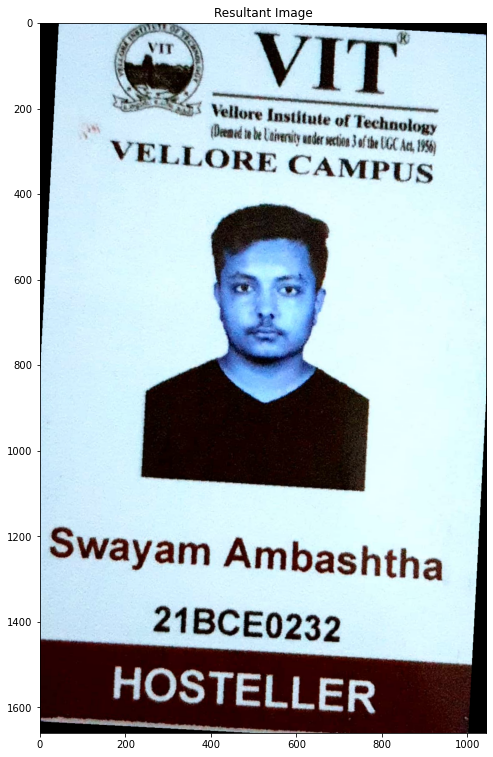

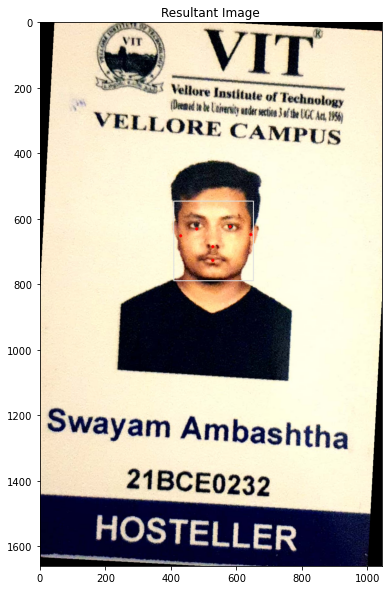

[([[503, 261], [756, 261], [756, 390], [503, 390]], 'VIT', 0.9989891593033435), ([[425, 387], [668, 387], [668, 440], [425, 440]], 'Vellore Institute ot', 0.5785322496159983), ([[423, 421], [522, 421], [522, 461], [423, 461]], '(Daaedt be', 0.16858593800368785), ([[576, 436], [814, 436], [814, 484], [576, 484]], 'det sbma J ofi (C Aat IS', 0.0125999666131499), ([[253, 441], [813, 441], [813, 538], [253, 538]], 'VELLORE CAMPUS', 0.9751813212338998), ([[145, 1080], [833, 1080], [833, 1201], [145, 1201]], 'Swayam Ambashtha', 0.9927682684699852), ([[323, 1214], [659, 1214], [659, 1300], [323, 1300]], '21BCE0232', 0.8932299657373205), ([[254, 1310], [719, 1310], [719, 1422], [254, 1422]], 'HOSTELLER', 0.7432095002538016), ([[667.1322781687254, 403.0952517592642], [815.979336570125, 421.5939452479464], [809.8677218312746, 455.9047482407358], [661.020663429875, 437.4060547520536]], 'Techoolony', 0.4181559010421549), ([[512.9011154884105, 426.1539042094367], [587.8578331473476, 436.94305941168

In [36]:
image_rotate(img1)